Import jeopardy.csv and create a dataframe from the data. 

In [34]:
# Dependencies and Setup
import pandas as pd
import numpy as np

file_to_load = "JEOPARDY_CSV.csv"

# read file
df = pd.read_csv(file_to_load)


a. How many rows are there in the dataframe? 
What does a row represent? - a question/answer combination for each round of each Jeopardy show. 
What is the "grain" - granularity - each row holds a question/answer pair for each category for each round.

In [35]:
#number of rows in the jeopardy dataframe
print('Number of rows in the Jeopardy dataframe',df.shape[0])

Number of rows in the Jeopardy dataframe 216930


b. clean the data. How do you need to "clean" it? What is "dirty" about this data?
some of the things to be cleaned:
    - column names have beginning space that needs to be removed
    - date is not the right format (not a "date" field)
    - Invalid values or missing values - need to determine which ones and what to do with them.

In [36]:
#printing the columns before fixing the names
print("before", df.columns)

#fixing the column names using rename and inplace=True
df.rename(columns={" Air Date":"Air Date"},inplace=True)
df.rename(columns={" Round":"Round"},inplace=True)
df.rename(columns={" Category":"Category"},inplace=True)
df.rename(columns={" Value":"Value"},inplace=True)
df.rename(columns={" Question":"Question"},inplace=True)
df.rename(columns={" Answer":"Answer"},inplace=True)

#printing the columns after fixing the names
print("after", df.columns)

before Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')
after Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


In [41]:
#determine if any answers are missing information
bool_series = pd.isnull(df["Answer"])
df[bool_series]

,Show Number,Air Date,Round,Category,Value,Question,Answer
94817,4346,6/23/2003,Jeopardy!,"GOING ""N""SANE",$200,"It often precedes ""and void""",NaN
143297,6177,6/21/2011,Double Jeopardy!,NOTHING,$400,"This word for ""nothing"" precedes ""and void"" to...",NaN


In [43]:
#update the missing answers with value of "Not Avail"
df.replace(to_replace=np.nan,value="Not Avail",inplace=True)

#check for success
bool_series = pd.isnull(df["Answer"])
print(df[bool_series])

,Show Number,Air Date,Round,Category,Value,Question,Answer


In [47]:
from datetime import datetime
#printing the column format before changing
print(df.info())

df['Air Date']= pd.to_datetime(df['Air Date'])
 
# Check the format of 'Air Date' column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1   Air Date     216930 non-null  object
 2   Round        216930 non-null  object
 3   Category     216930 non-null  object
 4   Value        216930 non-null  object
 5   Question     216930 non-null  object
 6   Answer       216930 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Show Number  216930 non-null  int64         
 1   Air Date     216930 non-null  datetime64[ns]
 2   Round        216930 non-null  object        
 3   Category     216930 non-null  object        
 4   Value        216930 non-null  object     

In [48]:
print(df['Air Date'])

0        2004-12-31
1        2004-12-31
2        2004-12-31
3        2004-12-31
4        2004-12-31
            ...    
216925   2006-05-11
216926   2006-05-11
216927   2006-05-11
216928   2006-05-11
216929   2006-05-11
Name: Air Date, Length: 216930, dtype: datetime64[ns]


c. How many unique shows were there each year?

In [70]:
import datetime

#creating new dataframe to hold just show number and air date
select_columns = df[["Show Number", "Air Date"]]
df_new = pd.DataFrame(select_columns)

#adding Year column to dataframe
df_new['Year'] = df_new['Air Date'].dt.year

counts_date = df_new.drop_duplicates(subset="Show Number").groupby("Year").size()
print(counts_date)

Year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
dtype: int64


d. How many times was each category used? 


In [182]:
# create a dataframe of just the category and count
cat_col = df["Category"].value_counts()
df_cat = pd.DataFrame(cat_col)
df_cat

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
...,...
POTPOURRI...NO FOOLIN',1
BRITISH PAINTERS,1
MIDWAY ISLAND,1
THE OXFORD ENGLISH DICTIONARY,1


e. Which month (over the years) has had the most shows?


In [99]:
#adding Month column to dataframe
df_new['Month'] = df_new['Air Date'].dt.month

#counting by Month
count_info = df_new.drop_duplicates(subset="Show Number").groupby("Month").size()

#sort values in descending order to get the month with the most shows over the years
count_info.sort_values(axis=0,ascending=False)

Month
11    434
1     355
12    352
5     351
10    347
4     330
3     329
6     321
2     293
9     272
7     256
dtype: int64

f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers.


In [104]:
select_qa = df[["Question", "Answer"]]
df_qa = pd.DataFrame(select_qa)

qa_group_df = df_qa.groupby("Answer")

qa_count = qa_group_df["Answer"].count()

temp_qa_df = pd.DataFrame({"Answers":qa_count,
                            "Question":qa_group_df["Question"]})

temp_qa_df.sort_values(by=["Answers"], ascending=False, inplace=True)
temp_qa_df.head(3)

,Answers,Question
Answer,,
China,216,"(China, [In 1958 this country launched its sec..."
Australia,215,"(Australia, [A 1994 festival honoring this cou..."
Japan,196,"(Japan, [In February 1904 this country attacke..."


2. Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately.

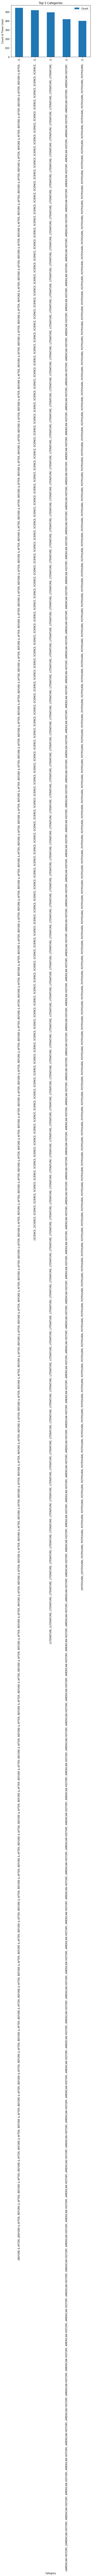

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
select_cat = df[["Category"]]

df_cat2 = pd.DataFrame(select_cat)

df_gp = df_cat2.groupby("Category")

cat_cnt = df_gp["Category"].count()


tmp_cat_df = pd.DataFrame({"Count":cat_cnt,
                            "Category":df_gp["Category"]})

tmp_cat_df.sort_values(by=["Count"], ascending=False, inplace=True)



tmp_cat_df.head(5).plot(x = 'Category', y= "Count",kind='bar',rot=90,title='Top 5 Categories', xlabel="Category", 
                        ylabel="Count of Times Used")
plt.show()
